In [2]:
from source.ion_channel import IonChannel
from source.patch_clamp import PatchClamp
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



## Learning how to do some stuff

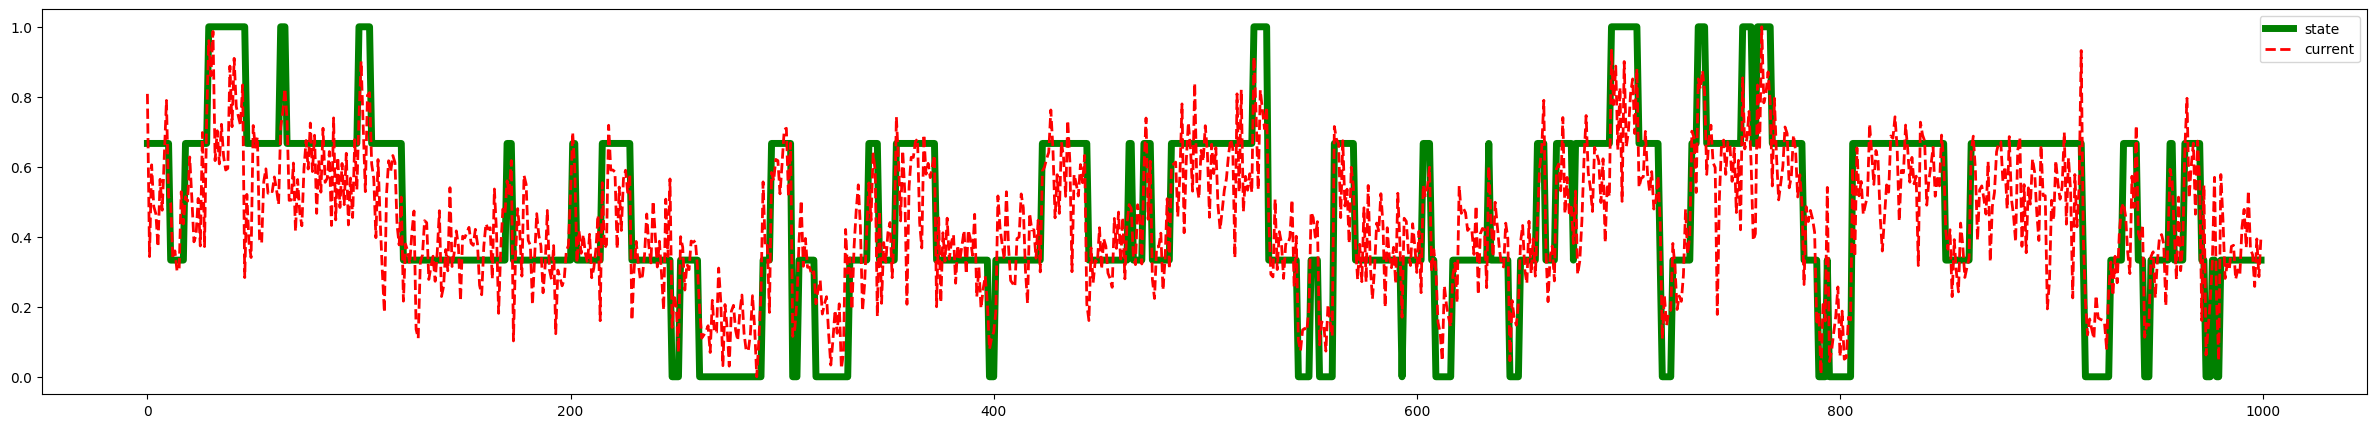

In [369]:
n_sample = 1000

p = PatchClamp([IonChannel(n_sample), IonChannel(n_sample), IonChannel(n_sample)])
s = p.get_state()
c = p.get_current()


normalized_s = (s - np.min(s)) / (np.max(s) - np.min(s))
normalized_c = (c - np.min(c)) / (np.max(c) - np.min(c))

plt.figure(figsize=(30, 5))
plt.plot(normalized_s, color='green', label='state', linestyle='solid', linewidth=5)
plt.plot(normalized_c, color='red', label='current', linestyle='dashed', linewidth=2)
plt.legend()


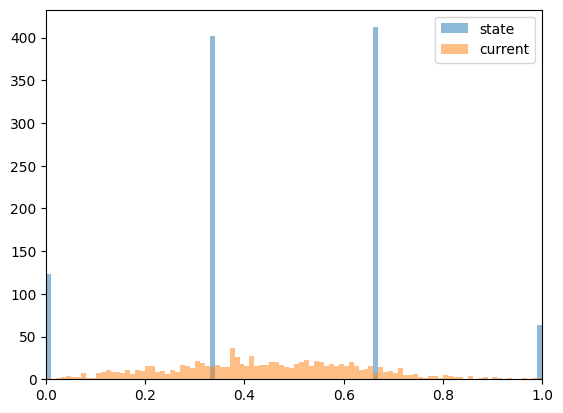

In [374]:
# get the distribution of the patch clamp data
bins = np.linspace(0, 1, 101)
plt.hist(normalized_s, bins, alpha=0.5, label='state')
hist = plt.hist(normalized_c, bins, alpha=0.5, label='current')
plt.legend(loc='upper right')
plt.xlim(0, 1)
plt.show()

# Data

In [373]:
X = []
y = []
for i in range(1500):
    random_ion_number = np.random.randint(1, 4)
    patch_clamp = PatchClamp([IonChannel(1000) for _ in range(random_ion_number)])
    normalized_X = (patch_clamp.X - np.min(patch_clamp.X)) / (np.max(patch_clamp.X) - np.min(patch_clamp.X))
    bins = np.linspace(0, 1, 101)
    hist_X, _ = np.histogram(normalized_X, bins=bins)
    X.append(hist_X)
    y.append(random_ion_number)
    

In [389]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(1500, 100)
(1500,)


In [391]:
X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]

In [395]:
y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

## Build a model

In [396]:
# keras model
encoder = keras.Sequential([
    tf.keras.layers.Input(shape=(100,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [397]:
encoder.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [399]:
encoder.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, batch_size=32)

Epoch 1/30
32/32 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.1837 - val_accuracy: 0.9480
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9990 - val_loss: 0.1903 - val_accuracy: 0.9460
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9440
Epoch 4/30
32/32 [==============================] - 0s 999us/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.1778 - val_accuracy: 0.9440
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1827 - val_accuracy: 0.9460
Epoch 6/30
32/32 [==============================] - 0s 982us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.1815 - val_accuracy: 0.9420
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1945 - val_accuracy: 0.9460
Epoch 8/30
32/32


## Test the model

In [400]:
y_pred = encoder.predict(X_test)

16/16 [==============================] - 0s 563us/step


In [402]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.956

## Save the model

In [404]:
# save the model
encoder.save('models/state_estimator_normalized_classification_with_artificial_data.keras')